<a href="https://colab.research.google.com/github/Sumaira-willis/Activity-2/blob/main/Project_1R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#LOAD THE DATA


prices = pd.read_csv("historical_stock_prices.csv")
stocks = pd.read_csv("historical_stocks.csv")

print("Prices columns:", prices.columns)
print("Stocks columns:", stocks.columns)


Prices columns: Index(['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume',
       'date'],
      dtype='object')
Stocks columns: Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')


In [3]:
# 2. CLEANING
# ---------------------------------------------------------

prices['date'] = pd.to_datetime(prices['date'])
prices.set_index('date', inplace=True)

# Missing values
prices = prices.ffill()
prices.drop_duplicates(inplace=True)
stocks.drop_duplicates(inplace=True)

print("\nMissing values in prices:")
print(prices.isnull().sum())



Missing values in prices:
ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
dtype: int64


In [4]:
# 3. MERGE PRICES + COMPANY INFO

merged = prices.merge(stocks, on="ticker", how="left")

# Restore index (merge removes index)
merged.index = prices.index

print("\nMerged dataset preview:")
print(merged.head())


Merged dataset preview:
           ticker   open  close  adj_close    low   high     volume exchange  \
date                                                                           
2013-05-08    AHH  11.50  11.58   8.493155  11.25  11.68  4633900.0     NYSE   
2013-05-09    AHH  11.66  11.55   8.471151  11.50  11.66   275800.0     NYSE   
2013-05-10    AHH  11.55  11.60   8.507822  11.50  11.60   277100.0     NYSE   
2013-05-13    AHH  11.63  11.65   8.544494  11.55  11.65   147400.0     NYSE   
2013-05-14    AHH  11.60  11.53   8.456484  11.50  11.60   184100.0     NYSE   

                                       name   sector     industry  
date                                                               
2013-05-08  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-09  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-10  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-13  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-0

In [5]:
# 4. CREATE YEAR & DECADE
# ---------------------------------------------------------

merged['year'] = merged.index.year
merged['decade'] = (merged['year'] // 10) * 10

print("\nDecade counts:")
print(merged['decade'].value_counts().sort_index())


Decade counts:
decade
1970.0      368
1980.0    15061
1990.0    34520
2000.0    66558
2010.0    85160
Name: count, dtype: int64


In [6]:
# 5. SPLIT INTO DECADES
# ---------------------------------------------------------

decades = {}
for d in sorted(merged['decade'].unique()):
    decades[d] = merged[merged['decade'] == d]
    print(f"Rows in decade {d}: {len(decades[d])}")


Rows in decade 1970.0: 368
Rows in decade 1980.0: 15061
Rows in decade 1990.0: 34520
Rows in decade 2000.0: 66558
Rows in decade 2010.0: 85160
Rows in decade nan: 0


In [7]:
# 6. SUMMARY STATISTICS
# ---------------------------------------------------------

summary = {d: decades[d][['open','high','low','close','volume']].describe()
           for d in decades}

print("\nSummary for 1990s:")
print(summary[1990])



Summary for 1990s:
               open          high           low         close        volume
count  34520.000000  34520.000000  34520.000000  34520.000000  3.452000e+04
mean      12.618631     12.833041     12.407862     12.625318  5.288926e+06
std       15.488701     16.039210     14.926861     15.498500  2.583555e+07
min        0.459821      0.473214      0.455357      0.462054  1.000000e+02
25%        4.345680      4.444445      4.250000      4.345680  1.400000e+04
50%        9.741183      9.833333      9.625000      9.750000  5.950000e+04
75%       15.891667     16.125000     15.700000     15.900000  2.304000e+05
max      391.638214    403.868042    369.169525    381.399323  1.047620e+09


/tmp/ipython-input-1976764729.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sample_2000s['close'].resample('M').mean()


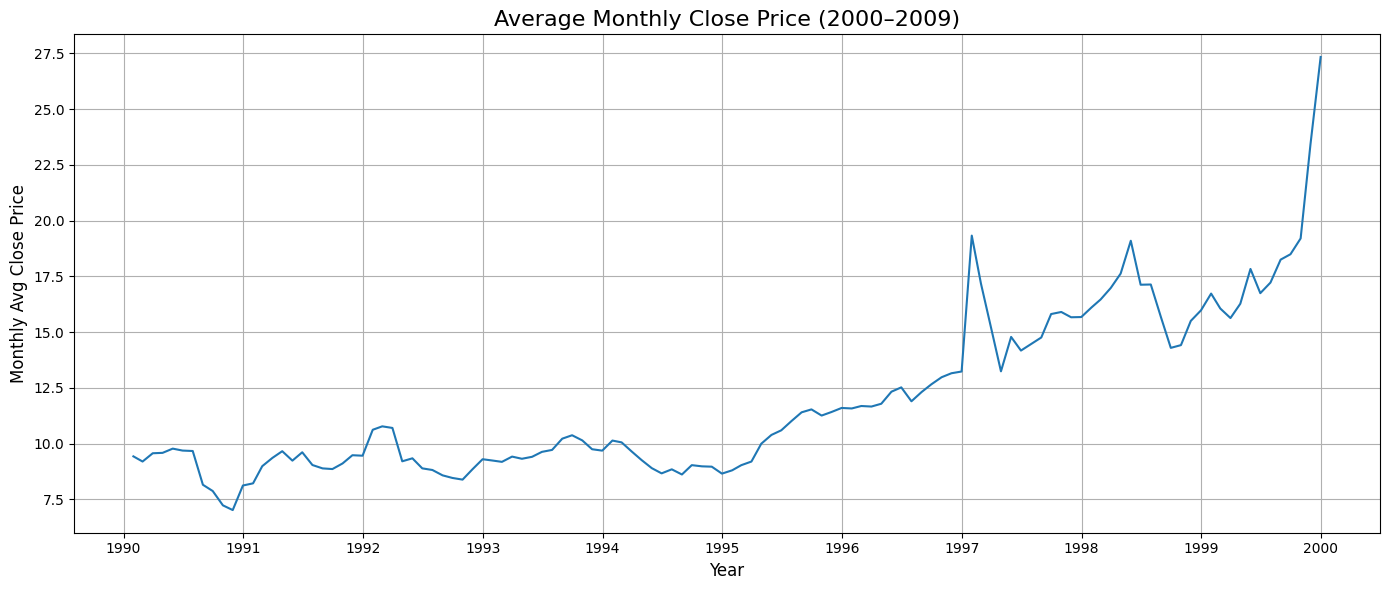

In [10]:
# 7. MUCH CLEARER VISUALIZATION
# ---------------------------------------------------------
# Instead of daily noise → we create monthly averages

sample_2000s = merged[merged['decade'] == 1990]

# Convert daily data → monthly average
monthly = sample_2000s['close'].resample('M').mean()

plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values)
plt.title("Average Monthly Close Price (2000–2009)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monthly Avg Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

sample_2000s = merged[merged['decade'] == 2000]

/tmp/ipython-input-381793036.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = sample_2000s['close'].resample('M').mean()


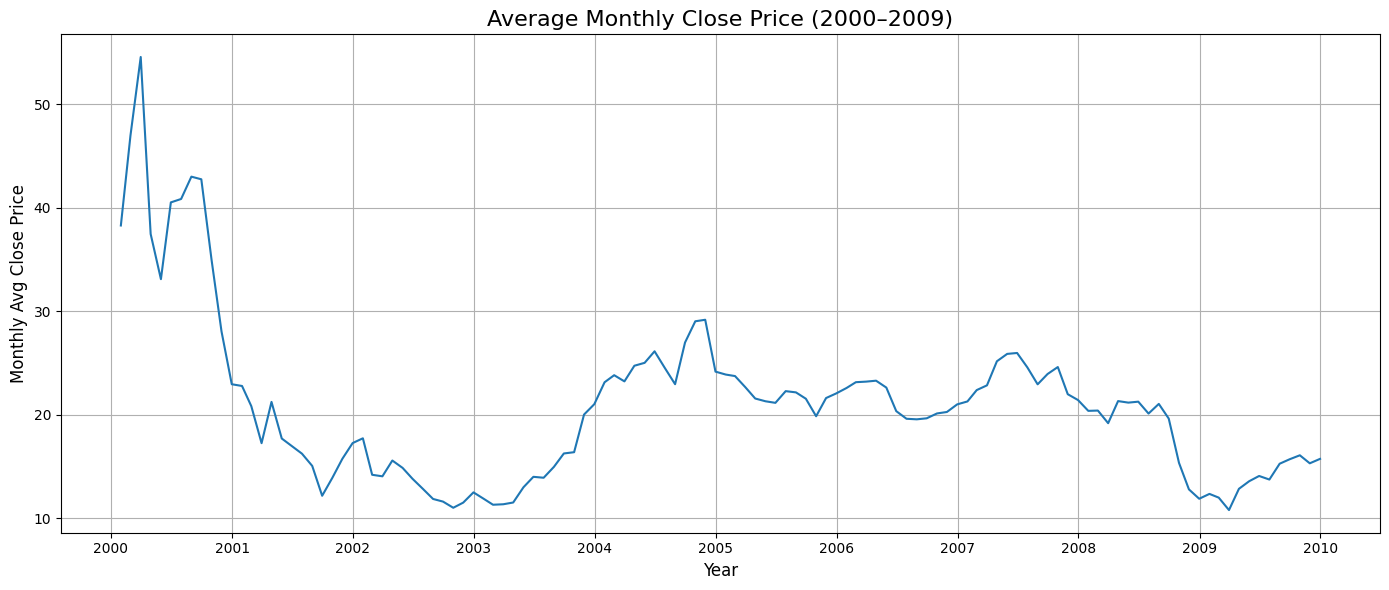

In [11]:
# Convert daily data → monthly average
monthly = sample_2000s['close'].resample('M').mean()

plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values)
plt.title("Average Monthly Close Price (2000–2009)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monthly Avg Close Price", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()